In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use(['dark_background'])

In [35]:
n = 1000
mu, sigma = 0, 0.1 # mean and standard deviation
x1 = np.random.normal(mu, sigma, n)
x2 = 2 * x1 + np.random.normal(mu, sigma, n)

In [36]:
x1.shape, x2.shape

((1000,), (1000,))

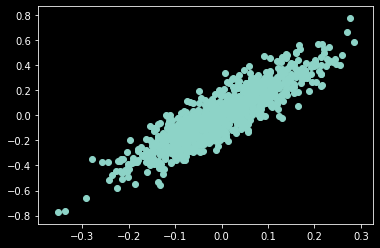

In [65]:
plt.scatter(x1, x2)

In [38]:
mu1 = x1.mean()
mu2 = x2.mean()

In [39]:
covar_x1x2 = (np.sum((x1 - mu1) * (x2 - mu2))) / (n -1) 

In [41]:
covar_x1x2

0.01952019926412491

# Calculate Eigenvectors and eigenvalues of the covariance matrix

1. The eigenvectors are perpendicular to each other
1. Notice one of the eigenvectors goes through the data like a line of best fit
1. The other shows us that the data follows the main line but is off by some amount
1. The eigenvector with the highest eigenvalue is the principal component of the dataset

In [126]:
X = np.stack((x1, x2), axis=0)
covar_x1x2 = np.cov(X) 
print(covar_x1x2)

[[0.00992973 0.0195202 ]
 [0.0195202  0.04853388]]


In [87]:
e_val, e_vec = np.linalg.eig(covar_x1x2)

In [88]:
e_val, e_vec

(array([0.00177988, 0.05668373]),
 array([[-0.92280084, -0.38527732],
        [ 0.38527732, -0.92280084]]))

In [89]:
e_vec[:,0]@e_vec[:,1] #they are perpendicular

0.0

In [90]:
np.linalg.norm(e_vec[:,0]) #it is a unit vector

0.9999999999999999

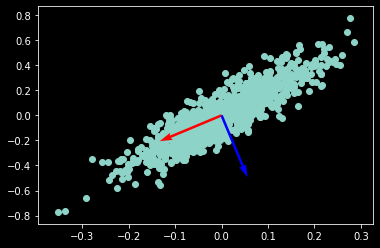

In [104]:
plt.scatter(x1, x2)
plt.quiver(0, 0, e_vec[:,0], e_vec[:,1], color=['r','b','g'], scale=5)
plt.show()

In [85]:
principal_component = e_vec[:, np.argmax(e_val)]
principal_component

array([-0.38527732, -0.92280084])

# Deriving a new dataset

In [116]:
mean_adj_data = X - np.expand_dims(np.array([mu1, mu2]), axis=1)

In [120]:
e_vec.shape

(2, 2)

In [119]:
mean_adj_data.shape

(2, 1000)

In [127]:
final_data = e_vec @ mean_adj_data

In [128]:
final_data

array([[-0.02379956,  0.0472623 ,  0.13276891, ...,  0.06113183,
         0.053608  , -0.10555319],
       [-0.03612832, -0.04876266,  0.12504995, ...,  0.12285151,
         0.13625652, -0.06992549]])